# [Jabama](https://www.jabama.com/) website data analysis

I will analyze data generated from *Jabama.com*. As we can see from scrap notebook, *Data.csv* consists of 27 features. Running *1-Scrap.ipynb* notebook is necessary for this notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

# !pip install Unidecode
from unidecode import unidecode

# !pip install arabic-reshaper
# !pip install python-bidi
from bidi.algorithm import get_display
from arabic_reshaper import reshape

## Why accommodation analysis
There are several main reasons for me to do this research. The most important ones are:
1.   According to the [World Economic Froum report in 2019](https://www.weforum.org/reports/the-travel-tourism-competitiveness-report-2019), Iran was the cheapest country for tourists in 2019 and it has remained one of the cheapest countries in recent years.
2.   Iran is also a safe country to travel, even safer than Russia, Egypt, India, Turkey, Brazil and Thailand. According to [World Economic Froum report in 2019](https://www.weforum.org/reports/the-travel-tourism-competitiveness-report-2019).
3.   As you can see [here](https://www.statista.com/statistics/233223/travel-and-tourism--total-economic-contribution-worldwide), the total share of travel and tourism in GDP worldwide has been steadily increasing from 2006 to 2019. This growth is expected to continue after [Covid 19 pandemic](https://en.wikipedia.org/wiki/COVID-19), in 2021. You can notice the growth of tourism share in Worldwide GPD in the next graph.
4.   Iran is one of the most popular destinations for tourists [in middle east](https://en.wikipedia.org/wiki/World_Tourism_rankings).
5.   Iran has a [diverse climate](https://en.wikipedia.org/wiki/Geography_of_Iran#:~:text=Iran%20has%20a%20variable%20climate,summers%20are%20dry%20and%20hot.&text=In%20general%2C%20Iran%20has%20a,falls%20from%20October%20through%20April), so you can travel around the country to experience a different climate in one day. Therefore, it is difficault to find a good place in different parts of the country.
6.   The number of [domestic and international tourists](https://www.amar.org.ir/%D8%AF%D8%A7%D8%AF%D9%87%D9%87%D8%A7-%D9%88-%D8%A7%D8%B7%D9%84%D8%A7%D8%B9%D8%A7%D8%AA-%D8%A2%D9%85%D8%A7%D8%B1%DB%8C/%D9%81%D8%B1%D9%87%D9%86%DA%AF-%D9%88%D8%B1%D8%B2%D8%B4-%D9%88-%DA%AF%D8%B1%D8%AF%D8%B4%DA%AF%D8%B1%DB%8C/%DA%AF%D8%B1%D8%AF%D8%B4%DA%AF%D8%B1%DB%8C#5686894--) was growing during the recent years in Iran.

The above reasons make it very difficult to find a suitable place to spend a night as a tourist. Therefore, studying and comparing data in different cities and provinces in the field of residence in Iran seems necessary.


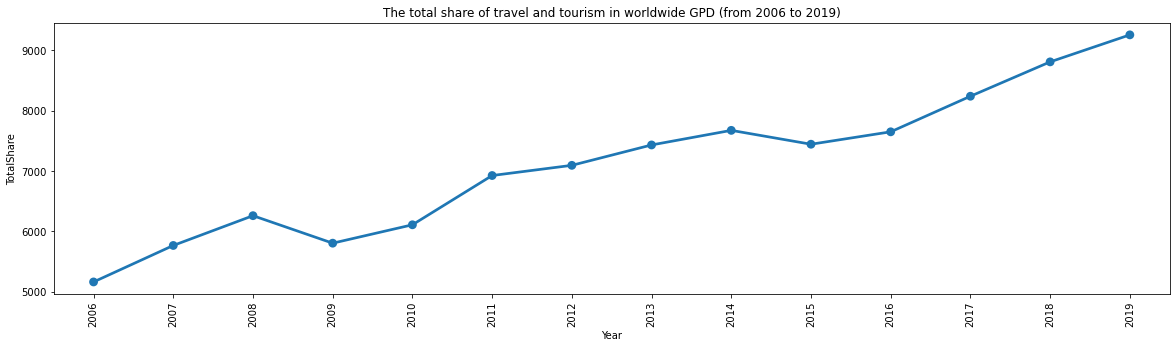

In [2]:
df_Gpd= pd.read_csv('TourismShareInGPD.csv', encoding="utf-8")  

plt.figure(figsize= (20, 5))
sns.pointplot(data=df_Gpd, x="Year", y="TotalShare")
plt.ylabel(get_display(reshape('TotalShare')))
plt.xlabel(get_display(reshape('Year')))
plt.title('The total share of travel and tourism in worldwide GPD (from 2006 to 2019)')
plt.xticks(rotation = "vertical")
plt.show()

## Load data
The input data is in *Data.csv*. I load it with *utf-8* encoding. Due to the way I searched the site for accommodations, many duplicated rows of data is generated, so I remove duplicates right after loading data. We can see the shape and sample rows of dataframe.

In [3]:
df = pd.read_csv('Data.csv', encoding="utf-8")  
df.drop_duplicates(subset =None, keep = 'first', inplace = True)
# df.reset_index()
df.shape

(4374, 27)

In [4]:
df.head()

,code,kind,price,comment,score,city,foundation,area,room,capacity,...,refrigerator,closet,cooking,oven,furniture,dining_table,restaurant,green_space,lobby,elavator
0,85754,inn,۱۶۰۰۰۰,۲۷,۴.۷,اردبیل- اردبیل,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۲ نفر,...,False,False,False,False,False,False,False,False,False,False
1,85779,inn,۲۰۰۰۰۰,۲۲,۴.۸,اردبیل- اردبیل,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۳ نفر,...,False,False,False,False,False,False,False,False,False,False
2,85775,inn,۲۵۰۰۰۰,۲۱,۴.۸,اردبیل- اردبیل,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۴ نفر,...,False,False,False,False,False,False,False,False,False,False
3,331103,ecotourism,۱۱۰۰۰۰,جدید,NaN,اردبیل- نمین,۱۲۰ متر زیربنا,۱۰۰۰ متر کل بنا,۰ اتاق,ظرفیت ۸ نفر,...,False,False,False,False,False,False,False,False,False,False
4,331102,ecotourism,۲۴۰۰۰۰,جدید,NaN,اردبیل- نمین,۱۲۰ متر زیربنا,۱۰۰۰ متر کل بنا,۱ اتاق,ظرفیت ۲ نفر,...,False,False,False,False,False,False,False,False,False,False


## Cleaning data
Because of the our data structures and *Farsi* characters, I have alot to do for cleaning data. The numeric data is located inside of a string phrase. For example the capacity number of accommodation is loctated inside of such a phrase : *ظرفیت تا ۱۰ نفر (۳ نفر پایه + تا ۷ نفر اضافه)*. 

I need to extract the numeric data from text and decode it, to obtain a usable data. Many features have this situation, some of them only need decoding, some of them need decoding and extraction. Therefore preparing data is a hard and time consuming process in this notebook. In addition to extraction and decoding, I set the type of all features so that I do not have any feature with object data type.

For this purpose, I will add some *temp* columns to dataframe for data separation. When this process ends, I remove those temparory columns.

I decide to add 3 new features to dataframe. The *capacity* feature contains 3 (*capacity*, *capacity_base* and *capacity_added*) features. The *city* feature also contains 2 (*city* and *province*) features. Lastly, our dataframe will consists of 30 features.

In [5]:
# int columns
df['price'] = pd.to_numeric(df.price.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['comment'] = pd.to_numeric(df.comment.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

# float column
df[['score','temp']] = df['score'].str.split('.',expand=True)
df['score'] = df['score'].replace(np.nan, '۰')
df['temp'] = df['temp'].replace(np.nan, '۰').astype(float)
df['score'] = pd.to_numeric(df.score.apply(unidecode), errors='coerce').astype(float)
df['score'] = df['score'] + (df['temp'] * 0.1)

# string columns
df['kind'] = df['kind'].astype(pd.StringDtype())

df[['room','temp1']] = df['room'].str.split('اتاق',expand=True)
df['room'] = pd.to_numeric(df.room.apply(unidecode), errors='coerce').astype(int)

df[['foundation','temp1']] = df['foundation'].str.split('متر زیربنا',expand=True)
df['foundation'] = pd.to_numeric(df.foundation.apply(unidecode), errors='coerce').astype(int)

df[['area','temp1']] = df['area'].str.split('متر کل بنا',expand=True)
df['area'] = pd.to_numeric(df.area.apply(unidecode), errors='coerce').astype(int)

df['double_bed'] = df['double_bed'].replace({'ندارد': '۰'}, regex=True)
df[['double_bed','temp1']] = df['double_bed'].str.split('تخت دو نفره',expand=True)
df['double_bed'] = pd.to_numeric(df.double_bed.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['single_bed'] = df['single_bed'].replace({'ندارد': '۰'}, regex=True)
df[['single_bed','temp1']] = df['single_bed'].str.split('تخت یک نفره',expand=True)
df['single_bed'] = pd.to_numeric(df.single_bed.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['iranian_bed'] = df['iranian_bed'].replace({'ندارد': '۰'}, regex=True)
df[['iranian_bed','temp1']] = df['iranian_bed'].str.split('رخت‌خواب سنتی',expand=True)
df['iranian_bed'] = pd.to_numeric(df.iranian_bed.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['toilet'] = df['toilet'].replace({'ندارد': '۰'}, regex=True)
df[['toilet','temp1']] = df['toilet'].str.split('سرویس بهداشتی',expand=True)
df['toilet'] = pd.to_numeric(df.toilet.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['bath'] = df['bath'].replace({'ندارد': '۰'}, regex=True)
df[['bath','temp1']] = df['bath'].str.split('حمام',expand=True)
df['bath'] = pd.to_numeric(df.bath.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

repl_dict ={ 
    'ظرفیت':'',
    'تا':'',
    'نفر':'',
    'پایه':'',
    'اضافه':''
}
df['capacity'] = df['capacity'].replace(repl_dict, regex=True)
df[['capacity','temp1']] = df['capacity'].str.split('(',expand=True)
df['temp1'] = df['temp1'].replace({'\)': ''}, regex=True)
df[['temp1','capacity_base']] = df['temp1'].str.split('+',expand=True)
df['capacity'] = pd.to_numeric(df.capacity.apply(unidecode), errors='coerce').astype(int)
df['capacity_base'] = df['capacity_base'].fillna('۰')
df['capacity_base'] = pd.to_numeric(df.capacity_base.apply(unidecode), errors='coerce').astype(int)
df['capacity_added'] = df['temp1'].fillna('۰')
df['capacity_added'] = pd.to_numeric(df.capacity_added.apply(unidecode), errors='coerce').astype(int)

df[['temp1','city']] = df['city'].str.split('-',expand=True).astype(pd.StringDtype())
df['city'] = df['temp1'].astype(pd.StringDtype())
df['province'] = df['temp1'].fillna('').astype(pd.StringDtype())
df['province'] = df['province'].str.strip()


As I said before, remove temparory columns and reorder the dataframe columns.

In [6]:
df.drop('temp', inplace=True, axis=1)
df.drop('temp1', inplace=True, axis=1)
df = df[['code','kind','price','comment','score','province','city','foundation','area','room','capacity_base','capacity_added'
         ,'capacity','double_bed','single_bed','iranian_bed','toilet','bath','water','water_cooler','refrigerator','closet'
         ,'cooking','oven','furniture','dining_table','restaurant','green_space','lobby','elavator']]

You can notice that data is extracted correctly and all 30 columns have correct, unique, non-null and decoded data. The head of data and column information are shown bellow.

In [7]:
df.head()

,code,kind,price,comment,score,province,city,foundation,area,room,...,refrigerator,closet,cooking,oven,furniture,dining_table,restaurant,green_space,lobby,elavator
0,85754,inn,160000,27,4.7,اردبیل,اردبیل,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,85779,inn,200000,22,4.8,اردبیل,اردبیل,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,85775,inn,250000,21,4.8,اردبیل,اردبیل,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,331103,ecotourism,110000,0,0.0,اردبیل,اردبیل,120,1000,0,...,False,False,False,False,False,False,False,False,False,False
4,331102,ecotourism,240000,0,0.0,اردبیل,اردبیل,120,1000,1,...,False,False,False,False,False,False,False,False,False,False


The final dataset will have 4374 rows and 27 columns. We have no null value, column's types contain *int*, *string*, *float* and *bool*.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 0 to 5202
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   code            4374 non-null   int64  
 1   kind            4374 non-null   string 
 2   price           4374 non-null   int32  
 3   comment         4374 non-null   int32  
 4   score           4374 non-null   float64
 5   province        4374 non-null   string 
 6   city            4374 non-null   string 
 7   foundation      4374 non-null   int32  
 8   area            4374 non-null   int32  
 9   room            4374 non-null   int32  
 10  capacity_base   4374 non-null   int32  
 11  capacity_added  4374 non-null   int32  
 12  capacity        4374 non-null   int32  
 13  double_bed      4374 non-null   int32  
 14  single_bed      4374 non-null   int32  
 15  iranian_bed     4374 non-null   int32  
 16  toilet          4374 non-null   int32  
 17  bath            4374 non-null   i

In the next cell, you can see the percentage of groups based on *Province* and *kind* of accommodations.

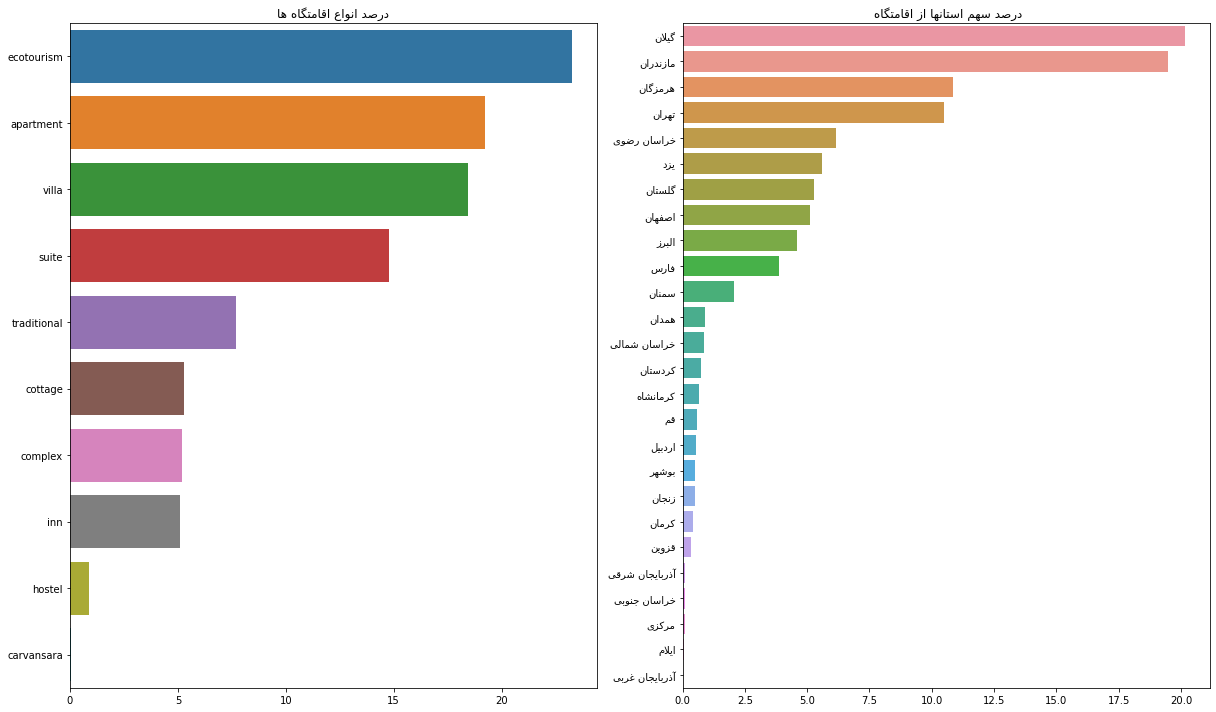

In [9]:
fig , axes = plt.subplots(1,2,figsize = (17, 10))

x_labels = df['kind'].value_counts(sort = True , normalize = True).index.tolist()
y_labels = df['kind'].value_counts(sort = True , normalize = True).tolist()
y_labels = [element * 100 for element in y_labels]
persian_labels = [get_display(reshape(label)) for label in x_labels]
data = {'kind':persian_labels, 'percentage':y_labels, 'kind_name':x_labels}
df_temp_kind = pd.DataFrame(data)
g1 = sns.barplot(y="kind", x="percentage", data=df_temp_kind, ax=axes[0])
g1.set(title=get_display(reshape('درصد انواع اقامتگاه ها')))
g1.set(xlabel=None)
g1.set(ylabel=None)


x_labels = df['province'].value_counts(sort = True , normalize = True).index.tolist()
y_labels = df['province'].value_counts(sort = True , normalize = True).tolist()
y_labels = [element * 100 for element in y_labels]
persian_labels = [get_display(reshape(label)) for label in x_labels]
data = {'province':persian_labels, 'percentage':y_labels, 'province_name':x_labels}
df_temp_province = pd.DataFrame(data)
g2 = sns.barplot(y="province", x="percentage", data=df_temp_province, ax=axes[1])
g2.set(title=get_display(reshape('درصد سهم استانها از اقامتگاه ')))
g2.set(xlabel=None)
g2.set(ylabel=None)

plt.tight_layout()
plt.show()

In [10]:
display(df_temp_province[['province_name','percentage']].head(6))
display(df_temp_kind[['kind_name','percentage']].head(6))

,province_name,percentage
0,گیلان,20.141747
1,مازندران,19.478738
2,هرمزگان,10.859625
3,تهران,10.470965
4,خراسان رضوی,6.149977
5,یزد,5.601280


,kind_name,percentage
0,ecotourism,23.251029
1,apartment,19.250114
2,villa,18.449931
3,suite,14.791952
4,traditional,7.704618
5,cottage,5.304070


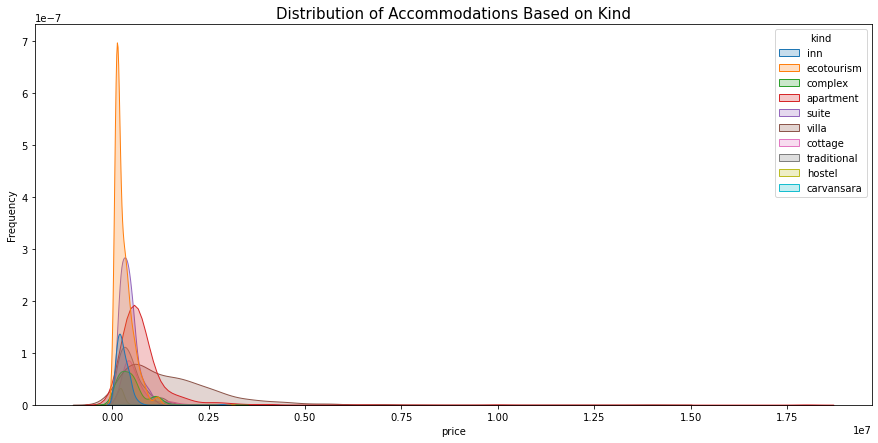

In [11]:
plt.figure(figsize= (15, 7))
sns.kdeplot(x = "price", hue = "kind", fill= True,data = df
            , palette= "tab10")
plt.title("Distribution of Accommodations Based on Kind", fontsize = 15)
plt.ylabel("Frequency")
plt.show()

# df_temp_province[df_temp_province['kind'] == 'villa']

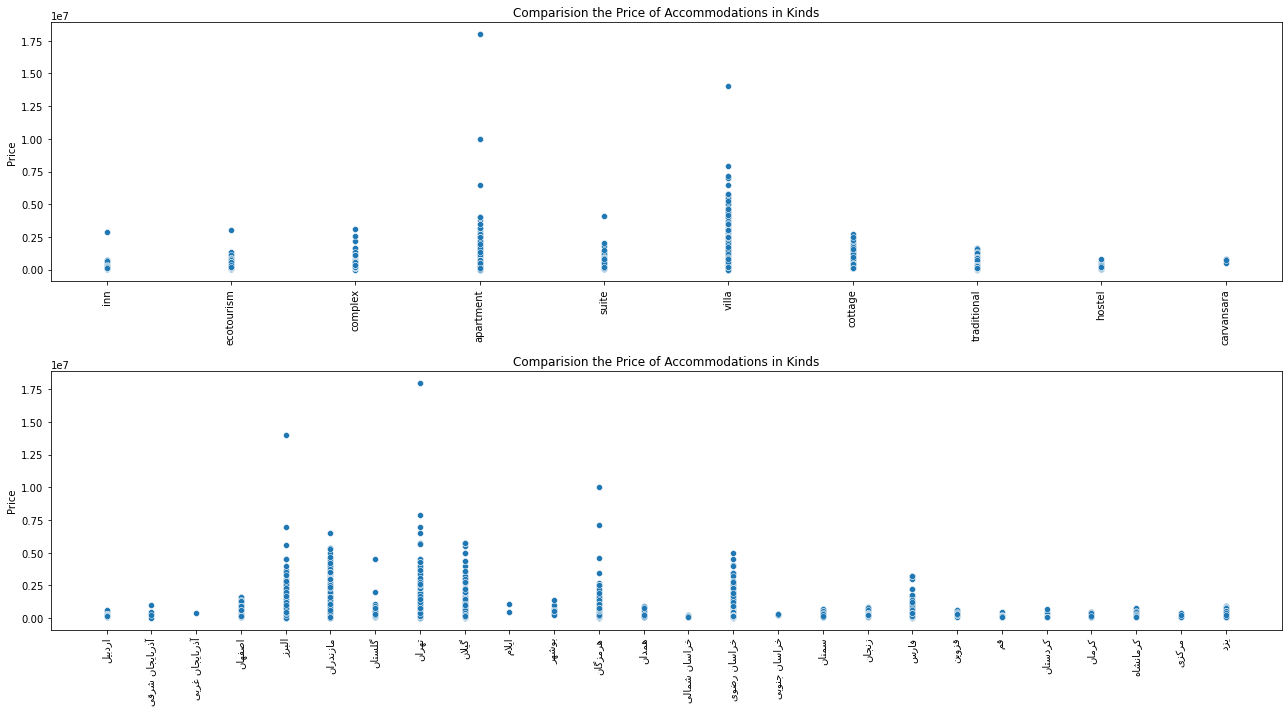

In [17]:
# df_temp_distribution = df[df['province'] == 'گیلان']
df_temp_distribution = df

fig , axes = plt.subplots(2,1,figsize = (18, 10))
g1 = sns.scatterplot(x = [get_display(reshape(label)) for label in df_temp_distribution['kind']]
                     , y = "price", data = df_temp_distribution, ax=axes[0])
# g1.set(title=get_display(reshape('ارزش ملک در محله ها')))
# g1.set(ylabel=get_display(reshape('ارزش ملک')))
g1.set(title='Comparision the Price of Accommodations in Kinds');
g1.set(ylabel='Price');
g1.set(xlabel=None)
plt.setp(axes[0].get_xticklabels(), rotation=90)


g2 = sns.scatterplot(x = [get_display(reshape(label)) for label in df_temp_distribution['province']]
                     , y = "price", data = df, ax=axes[1])
# g2.set(title=get_display(reshape('متراژ ملک در محله ها')))
# g2.set(ylabel=get_display(reshape('متراژ ملک')))
g2.set(title='Comparision the Price of Accommodations in Kinds');
g2.set(ylabel='Price');
g2.set(xlabel=None)
plt.setp(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [13]:
df.columns

Index(['code', 'kind', 'price', 'comment', 'score', 'province', 'city',
       'foundation', 'area', 'room', 'capacity_base', 'capacity_added',
       'capacity', 'double_bed', 'single_bed', 'iranian_bed', 'toilet', 'bath',
       'water', 'water_cooler', 'refrigerator', 'closet', 'cooking', 'oven',
       'furniture', 'dining_table', 'restaurant', 'green_space', 'lobby',
       'elavator'],
      dtype='object')

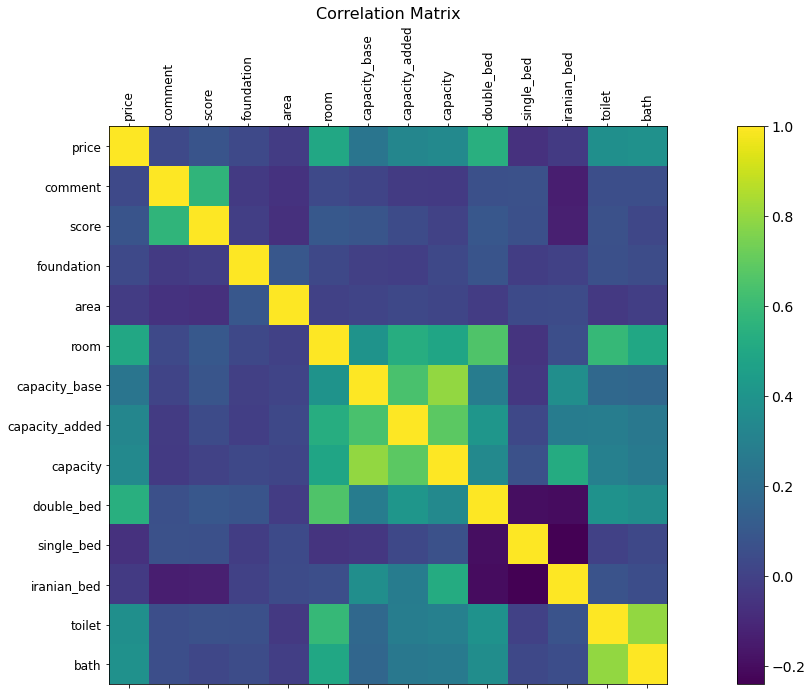

In [39]:
df_correlation = df[['price', 'comment', 'score', 'foundation', 'area', 'room', 'capacity_base', 'capacity_added',
       'capacity', 'double_bed', 'single_bed', 'iranian_bed', 'toilet', 'bath']]
fig = plt.figure(figsize=(25, 10))
plt.matshow(df_correlation.corr(), fignum=f.number)
plt.xticks(range(df_correlation.select_dtypes(['number']).shape[1]), df_correlation.select_dtypes(['number']).columns
           , fontsize=12, rotation=90)
plt.yticks(range(df_correlation.select_dtypes(['number']).shape[1]), df_correlation.select_dtypes(['number']).columns
           , fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);